In [1]:
# a. IMPORTING NECESSARY PACKAGES -&gt;
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


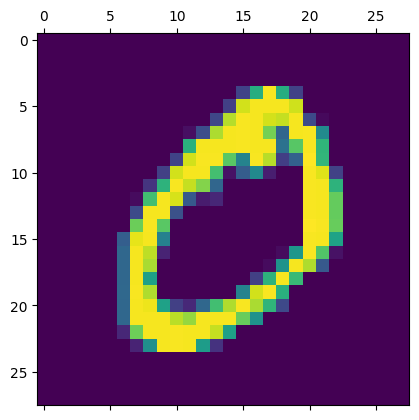

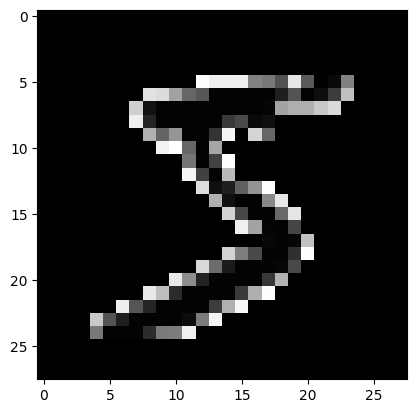

In [4]:
# Importing the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Splitting it into training and testing

# Plotting the first image of the training set
plt.matshow(x_train[1])  # Fixed typo, using plt.matshow()
plt.show()

# Displaying the first image with a gray colormap
plt.imshow(-x_train[0], cmap="gray")  # Fixed quotes
plt.show()

# Normalizing the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0


In [5]:
# Define the network architecture using Keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),  # Replaced &quot; with "
    keras.layers.Dense(10, activation="softmax")  # Replaced &quot; with "
])

# Display the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])  # Replaced &quot; and &#39; with proper quotes

# Train the model
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_test, y_test),
                    epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7338 - loss: 1.0239 - val_accuracy: 0.8998 - val_loss: 0.3598
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9002 - loss: 0.3597 - val_accuracy: 0.9175 - val_loss: 0.2947
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9167 - loss: 0.2927 - val_accuracy: 0.9272 - val_loss: 0.2629
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9259 - loss: 0.2660 - val_accuracy: 0.9329 - val_loss: 0.2369
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9325 - loss: 0.2419 - val_accuracy: 0.9372 - val_loss: 0.2200
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9394 - loss: 0.2187 - val_accuracy: 0.9414 - val_loss: 0.2041
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9431 - loss: 0.2062 - val_accuracy: 0.9448 - val_loss: 0.1915
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9465 - loss: 0.1936 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9429 - loss: 0.1910
Loss = 0.163
Accuracy = 0.951


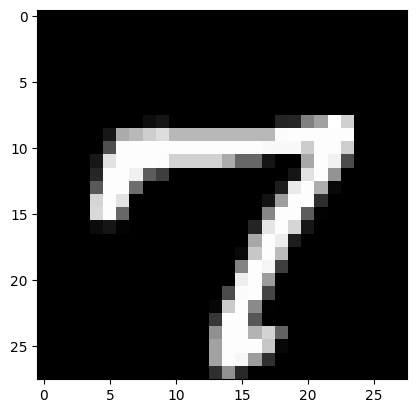

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


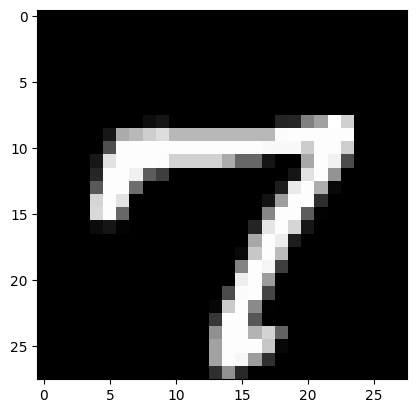

[6.2118698e-04 7.5116546e-08 9.5097988e-07 2.7809789e-05 3.1501739e-05
 2.0314755e-03 1.7986865e-07 9.9428225e-01 2.2738973e-04 2.7771601e-03]


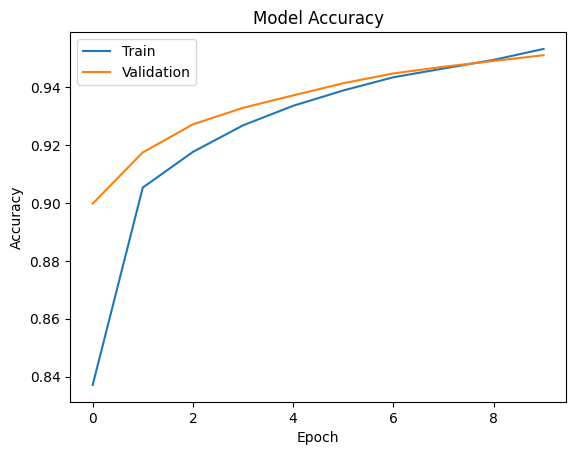

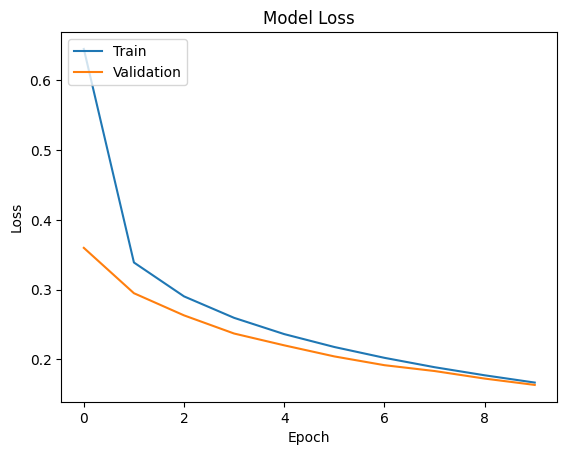

In [9]:
# Evaluate the network
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss = %.3f" % test_loss)
print("Accuracy = %.3f" % test_acc)

# Show a random test image
n = random.randint(0, 9999)
plt.imshow(x_test[n], cmap="gray")
plt.show()

# Make predictions
predicted_value = model.predict(x_test)
plt.imshow(x_test[n], cmap="gray")
plt.show()

# Show predicted value for the randomly chosen test image
print(predicted_value[n])

# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


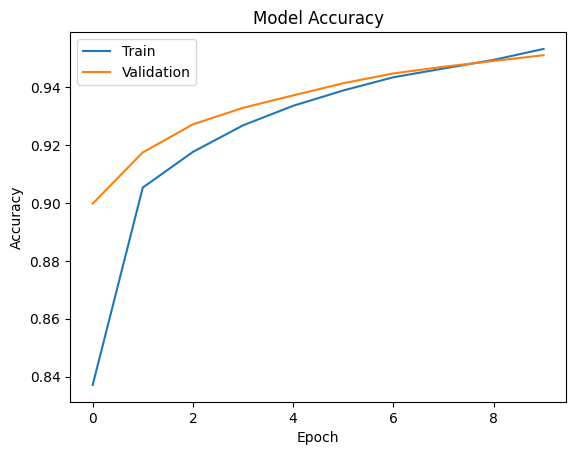

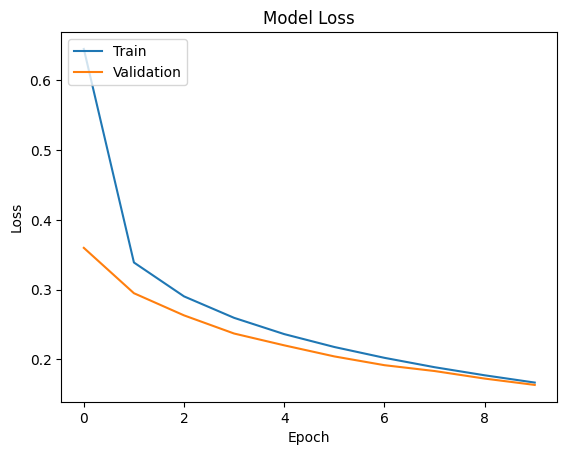